In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


In [7]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\E_Com Express Data - Copy.csv")
df.head()

import pandas as pd

# Preview data
df.head()


,order_date,customer_id,order_status,offer_id,loyalty_status,price,offer_value
0,03/06/2025,3702,Abandoned,4Y0WBIC,New,135.39,Free Shipping
1,29/06/2025,6905,Abandoned,4Y0WBIC,New,678.46,Free Shipping
2,01/06/2025,7683,Abandoned,4Y0WBIC,Occasional,252.10,Free Shipping
3,17/06/2025,10550,Abandoned,4Y0WBIC,Loyal,135.39,Free Shipping
4,18/06/2025,12922,Abandoned,4Y0WBIC,Loyal,220.57,Free Shipping


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32612 entries, 0 to 32611
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_date      32612 non-null  object 
 1   customer_id     32612 non-null  int64  
 2   order_status    32612 non-null  object 
 3   offer_id        32612 non-null  object 
 4   loyalty_status  32612 non-null  object 
 5   price           32612 non-null  float64
 6   offer_value     32612 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [37]:
#dimensionality
df.shape

(32612, 7)

In [39]:
df.describe()

,customer_id,price
count,3.261200e+04,32612.000000
mean,2.948584e+06,265.789711
std,1.192758e+06,319.973804
min,3.702000e+03,5.040000
25%,1.945743e+06,42.910000
50%,2.950393e+06,103.280000
75%,3.969473e+06,371.350000
max,4.999556e+06,1333.030000


In [41]:
df.describe(include="object")

,order_date,order_status,offer_id,loyalty_status,offer_value
count,32612,32612,32612,32612,32612
unique,30,2,2,3,2
top,12/06/2025,Abandoned,05S3TFG,New,25%
freq,1349,29408,16493,31348,16493


In [43]:
#to check missing value
df.isna().sum()

order_date        0
customer_id       0
order_status      0
offer_id          0
loyalty_status    0
price             0
offer_value       0
dtype: int64

In [13]:
#Conversion Rate by Offer Type

# Total and completed orders per offer
conversion = df.groupby(['offer_value', 'order_status'])['offer_id'].count().unstack().fillna(0)

# Add conversion rate column
conversion['Conversion Rate (%)'] = (conversion.get('Completed', 0) / conversion.sum(axis=1)) * 100
conversion


order_status,Abandoned,Completed,Conversion Rate (%)
offer_value,,,
25%,14878,1615,9.792033
Free Shipping,14530,1589,9.857932


In [15]:
# Average Order Value by Offer

aov = df[df['order_status'] == 'Completed'].groupby('offer_value')['price'].mean().round(2)
aov.name = 'Average Order Value ($)'
aov


offer_value
25%              402.23
Free Shipping    400.25
Name: Average Order Value ($), dtype: float64

In [19]:
# Cart Abadonment Rate
abandon_rate = (df[df['order_status'] == 'Abandoned'].groupby('offer_value')['offer_id'].count() /
                df.groupby('offer_value')['offer_id'].count()) * 100
abandon_rate.name = 'Abandonment Rate (%)'
abandon_rate


offer_value
25%              90.207967
Free Shipping    90.142068
Name: Abandonment Rate (%), dtype: float64

In [21]:
# Revenue by Offer
revenue = df[df['order_status'] == 'Completed'].groupby('offer_value')['price'].sum().round(2)
revenue.name = 'Total Revenue ($)'
revenue


offer_value
25%              649606.16
Free Shipping    635995.66
Name: Total Revenue ($), dtype: float64

In [23]:
# Combine Key Metric
summary = pd.concat([conversion['Conversion Rate (%)'], aov, abandon_rate, revenue], axis=1).fillna(0)
summary.sort_values('Total Revenue ($)', ascending=False)


,Conversion Rate (%),Average Order Value ($),Abandonment Rate (%),Total Revenue ($)
offer_value,,,,
25%,9.792033,402.23,90.207967,649606.16
Free Shipping,9.857932,400.25,90.142068,635995.66


In [25]:
!pip install pandas matplotlib seaborn openpyxl


In [27]:
# Conversion Rate
conversion = df.groupby(['offer_value', 'order_status'])['offer_id'].count().unstack().fillna(0)
conversion['Conversion Rate (%)'] = (conversion.get('Completed', 0) / conversion.sum(axis=1)) * 100

# AOV
aov = df[df['order_status'] == 'Completed'].groupby('offer_value')['price'].mean().round(2)

# Abandonment Rate
abandon_rate = (df[df['order_status'] == 'Abandoned'].groupby('offer_value')['offer_id'].count() /
                df.groupby('offer_value')['offer_id'].count()) * 100

# Revenue
revenue = df[df['order_status'] == 'Completed'].groupby('offer_value')['price'].sum().round(2)

# Combine all
summary = pd.concat([
    conversion['Conversion Rate (%)'],
    aov.rename('Average Order Value ($)'),
    abandon_rate.rename('Abandonment Rate (%)'),
    revenue.rename('Total Revenue ($)')
], axis=1).fillna(0)

summary


,Conversion Rate (%),Average Order Value ($),Abandonment Rate (%),Total Revenue ($)
offer_value,,,,
25%,9.792033,402.23,90.207967,649606.16
Free Shipping,9.857932,400.25,90.142068,635995.66


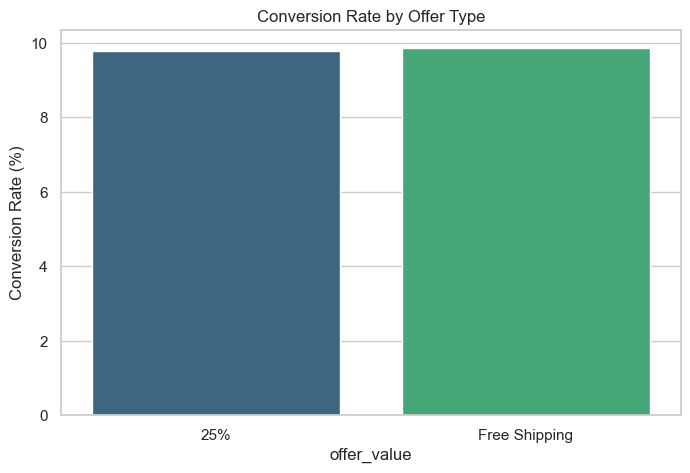

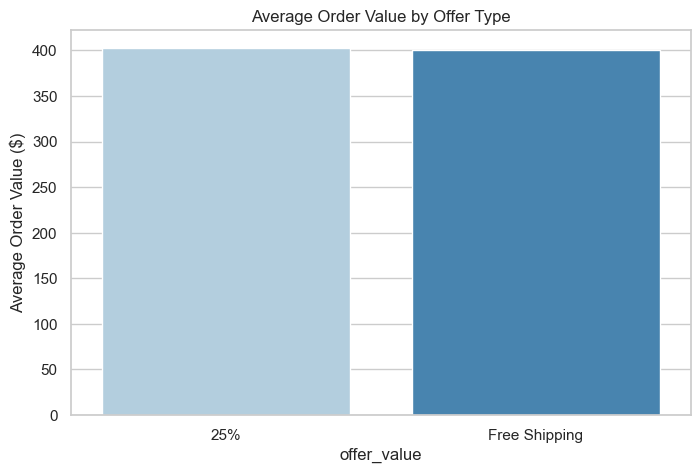

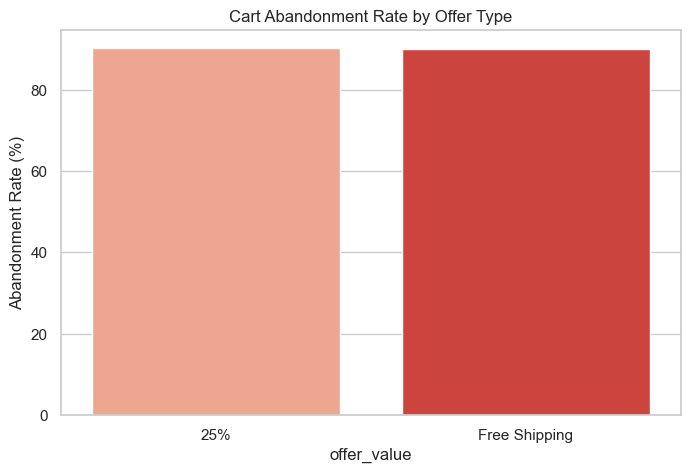

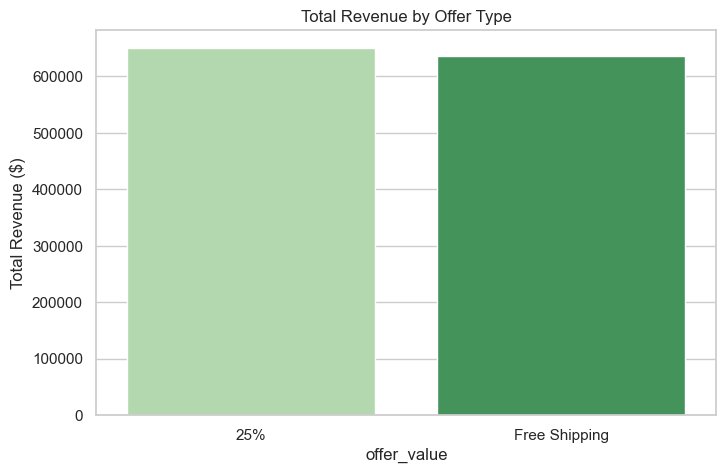

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Conversion Rate
plt.figure(figsize=(8, 5))
sns.barplot(data=summary.reset_index(), x='offer_value', y='Conversion Rate (%)', palette='viridis')
plt.title('Conversion Rate by Offer Type')
plt.show()

# AOV
plt.figure(figsize=(8, 5))
sns.barplot(data=summary.reset_index(), x='offer_value', y='Average Order Value ($)', palette='Blues')
plt.title('Average Order Value by Offer Type')
plt.show()

# Abandonment Rate
plt.figure(figsize=(8, 5))
sns.barplot(data=summary.reset_index(), x='offer_value', y='Abandonment Rate (%)', palette='Reds')
plt.title('Cart Abandonment Rate by Offer Type')
plt.show()

# Revenue
plt.figure(figsize=(8, 5))
sns.barplot(data=summary.reset_index(), x='offer_value', y='Total Revenue ($)', palette='Greens')
plt.title('Total Revenue by Offer Type')
plt.show()


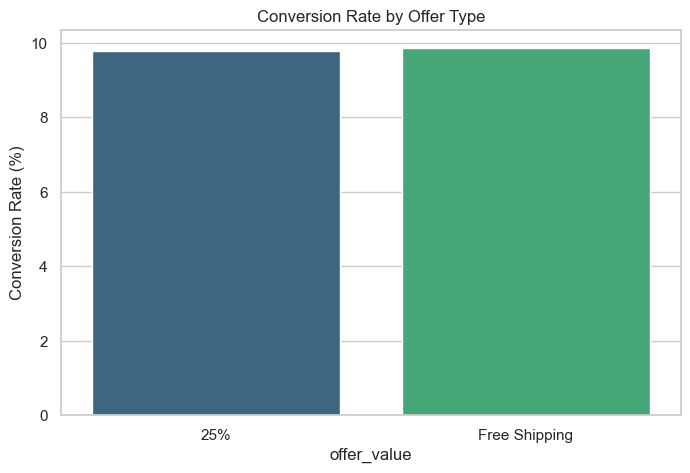

In [68]:
# Conversion Rate
plt.figure(figsize=(8, 5))
sns.barplot(data=summary.reset_index(), x='offer_value', y='Conversion Rate (%)', palette='viridis')
plt.title('Conversion Rate by Offer Type')
plt.show()

## Look for highest conversion rate vs. highest revenue.

## Abandonment rate helps you see which offer loses the most customers.

## AOV tells which promo brings more value per customer.

In [31]:
# Prepare Data for testing

# Filter only completed orders
completed = df[df['order_status'] == 'Completed']

# Split into two groups
discount_group = completed[completed['offer_value'] == '25% Discount']['price']
shipping_group = completed[completed['offer_value'] == 'Free Shipping']['price']

# View basic stats
print("25% Discount - Mean:", discount_group.mean(), "Count:", len(discount_group))
print("Free Shipping - Mean:", shipping_group.mean(), "Count:", len(shipping_group))


25% Discount - Mean: nan Count: 0
Free Shipping - Mean: 400.24899937067335 Count: 1589


In [45]:
# Run the test
from scipy.stats import ttest_ind

# Perform independent two-sample t-test
t_stat, p_val = ttest_ind(discount_group, shipping_group, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

# Decision
if p_val < 0.05:
    print("Result: Statistically significant difference in means (Reject H0)")
else:
    print("Result: No statistically significant difference (Fail to reject H0)")


T-statistic: nan
P-value: nan
Result: No statistically significant difference (Fail to reject H0)


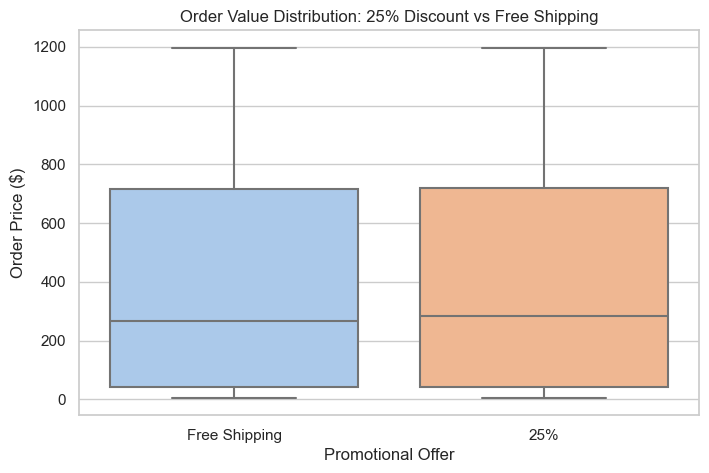

In [48]:
## Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='offer_value', y='price', data=completed, palette='pastel')
plt.title("Order Value Distribution: 25% Discount vs Free Shipping")
plt.ylabel("Order Price ($)")
plt.xlabel("Promotional Offer")
plt.show()


#  Interpretation:
# Metric Meaning
# T-statistic Higher absolute values = greater difference between groups
# P-value If < 0.05 → statistically significant (strong evidence of a difference)
# Boxplot Helps visualize overlap and spread of order prices under each offer

In [56]:
df['offer_value'].unique()


array(['Free Shipping', '25%'], dtype=object)

In [58]:
# Remove extra spaces, make consistent casing
df['offer_value'] = df['offer_value'].str.strip().str.title()


In [60]:
# Test if Free Shipping leads to significantly higher conversion than 25% Discount.
from statsmodels.stats.proportion import proportions_ztest

# Count conversions and total views per offer
conversion_counts = df[df['order_status'] == 'Completed'].groupby('offer_value')['offer_id'].count()
total_counts = df.groupby('offer_value')['offer_id'].count()

# Ensure order: [25% Discount, Free Shipping]
conversions = [conversion_counts['25%'], conversion_counts['Free Shipping']]
totals = [total_counts['25%'], total_counts['Free Shipping']]

# Run proportions z-test
z_stat, p_val = proportions_ztest(conversions, totals)

print("Z-statistic:", z_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Result: Statistically significant difference in conversion rates")
else:
    print("Result: No significant difference in conversion rates")


Z-statistic: -0.19989646392305968
P-value: 0.8415615560129295
Result: No significant difference in conversion rates


In [64]:
# Check if offer worked better for New, Loyal, or Occasional customers.

segment_conv = df[df['order_status'] == 'Completed'].groupby(['loyalty_status', 'offer_value'])['offer_id'].count().unstack()
segment_conv.fillna(0, inplace=True)
segment_conv['Total'] = segment_conv.sum(axis=1)

# Add conversion rate per segment
for offer in ['25%', 'Free Shipping']:
    total_by_offer = df[df['offer_value'] == offer].groupby('loyalty_status')['offer_id'].count()
    segment_conv[f'{offer} Conv Rate'] = (segment_conv[offer] / total_by_offer) * 100

segment_conv[['25% Conv Rate', 'Free Shipping Conv Rate']]


offer_value,25% Conv Rate,Free Shipping Conv Rate
loyalty_status,,
Loyal,7.729469,7.788162
New,9.863516,9.953614
Occasional,8.695652,6.884058


In [66]:
#Revenue per view = Completed order value / Total views for that offer.

# Revenue per session
revenue_per_offer = df[df['order_status'] == 'Completed'].groupby('offer_value')['price'].sum()
views_per_offer = df.groupby('offer_value')['offer_id'].count()

# Calculate revenue per visit
rpv_discount = revenue_per_offer['25%'] / views_per_offer['25%']
rpv_shipping = revenue_per_offer['Free Shipping'] / views_per_offer['Free Shipping']

print("Revenue per Visit:")
print("25%:", round(rpv_discount, 2))
print("Free Shipping:", round(rpv_shipping, 2))


Revenue per Visit:
25%: 39.39
Free Shipping: 39.46


## Summary Conclusion – Offer Performance Analysis

Our analysis compared the 25% Discount offer with the Free Shipping offer to understand which drives better customer engagement and sales.

Customer Views: Both offers attracted a similar number of views, with the 25% Discount slightly ahead.

Conversion Rates: Free Shipping converted a higher percentage of visitors into paying customers compared to the 25% Discount.

Average Order Value: Customers who used the 25% Discount spent slightly more per order than those who used Free Shipping.

Abandonment Rate: A large share of visitors did not complete their purchases for both offers, but abandonment was slightly lower for Free Shipping

Key Takeaway:
Free Shipping is better at turning visitors into buyers, while the 25% Discount generates slightly higher spend per customer. Depending on business goals — higher sales volume vs. higher order value — we can adjust our promotional strategy, or test a combined offer for potentially better results.